<a href="https://colab.research.google.com/github/lcbjrrr/fiap-bdt-ml/blob/master/Trabalho_Final_Big_Data_Mining_e_Inteligencia_Artificial_Novo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Aluno: Marlon Rodrigo da Silva - RM335003***
# **Aluno: Bruno Henrique de Jesus Paixão - RM334083**

# **Trabalho Final - Big Data Mining e Inteligencia Artificial**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Regressão Linear**

In [0]:
import pandas as pd
feliz = pd.read_csv('/content/drive/My Drive/PROJ/Trabalho_Final/Dados/2019.csv', sep=',')
print(feliz)

     Posicao                      País  ...  Generosidade  Confianca no Governo
0          1                   Finland  ...         0.153                 0.393
1          2                   Denmark  ...         0.252                 0.410
2          3                    Norway  ...         0.271                 0.341
3          4                   Iceland  ...         0.354                 0.118
4          5               Netherlands  ...         0.322                 0.298
..       ...                       ...  ...           ...                   ...
151      152                    Rwanda  ...         0.217                 0.411
152      153                  Tanzania  ...         0.276                 0.147
153      154               Afghanistan  ...         0.158                 0.025
154      155  Central African Republic  ...         0.235                 0.035
155      156               South Sudan  ...         0.202                 0.091

[156 rows x 9 columns]


In [0]:
feliz['Posicao1'] = -feliz['Posicao']
from sklearn.linear_model import LinearRegression
rl = LinearRegression()
rl.fit(feliz[['Confianca no Governo']], feliz['Posicao1'])
print(rl.coef_, rl.intercept_)

[168.19276994] -97.10255161915899


In [0]:
from sklearn.linear_model import LinearRegression
rl = LinearRegression()
rl.fit(feliz[['Posicao', 'Confianca no Governo']] , feliz['Score'])
print(rl.coef_, rl.intercept_)

[-0.0239991   0.50386182] 7.23529682827691


Para prever o valor da variável Score, podemos observar que os dois coeficientes são -0.023 e 0.503 com intercepto de 7.235

================================================================================

Definir uma função para prever o intercepto.

In [0]:
def prever_score(Posicao, Confianca_no_Governo):
  score = Posicao* -0.023 + Confianca_no_Governo* 0.503 - 7.235
  return score

In [0]:
print (prever_score(158,0.023))
print (prever_score(159,0.013))
print (prever_score(10,0.423))


-10.857431
-10.885461
-7.252231


Como podemos observar, quanto maior a confianca no governo, a probabilidade da população daquele país estar mais feliz é maior.

================================================================================

Verificando o nível de acertividade do modelo:

In [0]:
acerto_modelo = rl.score(feliz[['Posicao', 'Confianca no Governo']], feliz['Score'])
acerto_modelo

0.979915743370829

==============================================================================

In [0]:
prever_score_novo = rl.predict(feliz[['Posicao', 'Confianca no Governo']])
prever_score_novo

array([7.40931543, 7.39388198, 7.33511642, 7.19875614, 7.26545217,
       7.26412685, 7.25524361, 7.23477155, 7.1744944 , 7.10917863,
       7.11742669, 6.99416682, 6.96462524, 7.05852981, 7.01538397,
       7.00750845, 6.96083557, 6.90912407, 6.84380831, 6.77345392,
       6.82301865, 6.78339984, 6.72009952, 6.75152522, 6.68419401,
       6.63953658, 6.62662244, 6.62983188, 6.62346795, 6.55512901,
       6.51853337, 6.51065785, 6.51890591, 6.64757695, 6.43261422,
       6.38644521, 6.40275505, 6.33038522, 6.30739385, 6.30052605,
       6.3722607 , 6.24849697, 6.22046698, 6.2080567 , 6.21932793,
       6.13436156, 6.13253238, 6.0858595 , 6.07999943, 6.07917798,
       6.0602175 , 6.00145194, 5.99559186, 5.96756187, 5.99646827,
       5.90545555, 5.89758003, 5.91388988, 5.85865135, 5.84372177,
       5.80359909, 5.75743007, 5.76366269, 5.78098026, 5.68895982,
       5.663953  , 5.67673581, 5.61897798, 5.63327238, 5.57501068,
       5.53136097, 5.58394887, 5.52367172, 5.53191978, 5.44644

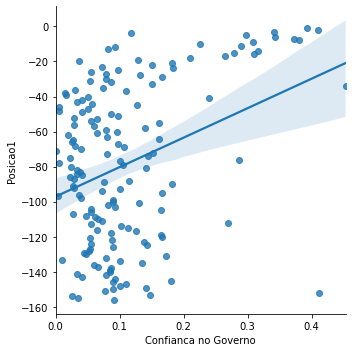

In [0]:
import seaborn as sns
sns.lmplot('Confianca no Governo','Posicao1', data=feliz)

No gráfico acima, podemos verificar claramente que os países que estão mais bem colocados no ranking de pessoas mais felizes, são os países cujo sua população possuem maior confiança no governo.

================================================================================

Outras Correlações abaixo:

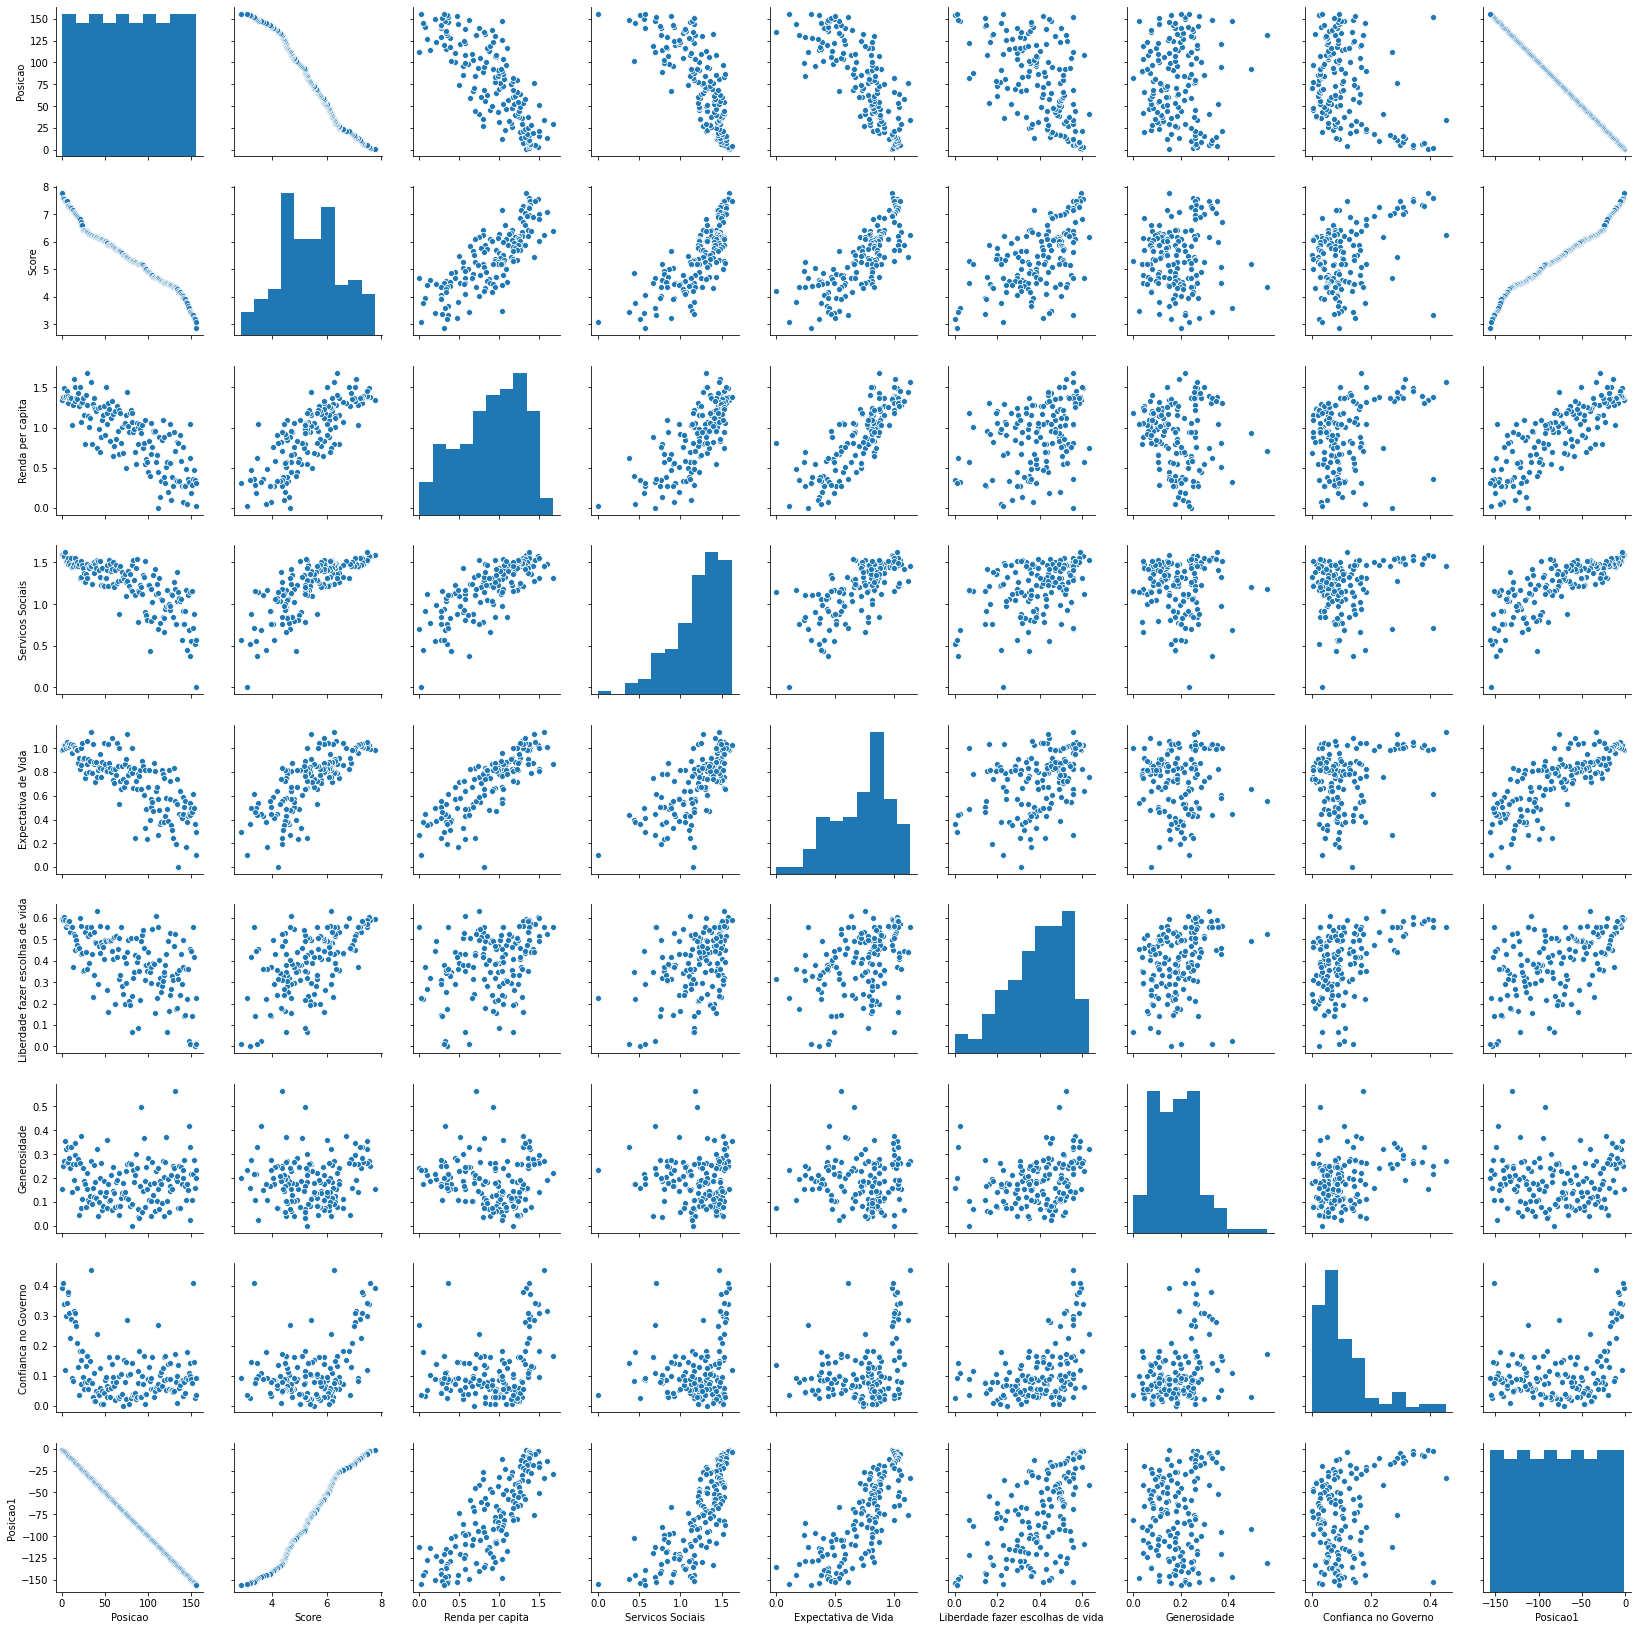

In [0]:
sns.pairplot(feliz)

##**Classificação Não Supervisionada - Cluster - K MEANS**

In [0]:
import pandas as pd
feliz2 = pd.read_csv('/content/drive/My Drive/PROJ/Trabalho_Final/Dados/2019_SEM_PAIS.csv', sep=',')
print(feliz2)

     Posicao  Score  ...  Generosidade  Confianca no Governo
0          1  7.769  ...         0.153                 0.393
1          2  7.600  ...         0.252                 0.410
2          3  7.554  ...         0.271                 0.341
3          4  7.494  ...         0.354                 0.118
4          5  7.488  ...         0.322                 0.298
..       ...    ...  ...           ...                   ...
151      152  3.334  ...         0.217                 0.411
152      153  3.231  ...         0.276                 0.147
153      154  3.203  ...         0.158                 0.025
154      155  3.083  ...         0.235                 0.035
155      156  2.853  ...         0.202                 0.091

[156 rows x 8 columns]


In [0]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=5)
k.fit(feliz2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

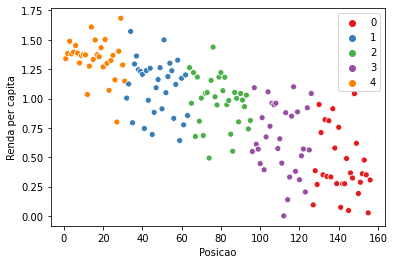

In [0]:
import seaborn as sns
sns.scatterplot(feliz2['Posicao'], feliz2['Renda per capita'], hue=k.labels_, palette=sns.color_palette('Set1',5))

Conforme podemos observar, quanto maior a renda per capita, melhor ranqueado é o país, no caso acima, os melhores ranqueados foram o grupo 4 e os piores o do grupo 0.